<a href="https://colab.research.google.com/github/rajagopalmotivate/WiproMultiModalClassifierOffensive/blob/main/Enduser_Declares_Active_Features_to_improve_X_Multimodal_classifer_ver_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Wipro's Intelligent Multimodal platform ***
## ***A innovative path to partnering for revenue growth ***

# Step Pre 0: Install stuff that require restart of runtime 

In [ ]:
!pip install pytesseract

In [ ]:
 

!sudo apt install tesseract-ocr


In [ ]:
!sudo apt install libtesseract-dev

In [ ]:
!pip install Pillow==9.0.0


In [1]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Step 0: Fetch the dataset  
download the images and 3 CSV file

In [ ]:
#images
#https://drive.google.com/drive/folders/1GGy63-KlrSLjhpbTNGV-ObS_M4JMxeLr?usp=share_link
#https://drive.google.com/drive/folders/1hKLOtpVmF45IoBmJPwojgq6XraLtHmV6


In [ ]:
#CSV 
#https://drive.google.com/drive/folders/1ckOGoRmMwCEFo-k3UX7J2lnzg495WIS5?usp=share_link


In [2]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = 'nandriImages/'
try:
    os.makedirs(local_download_path)
except: pass

local_download_path = 'nandriCSV/'
try:
    os.makedirs(local_download_path)
except: pass


In [ ]:
!pwd

In [ ]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters

 
file_list = drive.ListFile(
    {'q': "'1ckOGoRmMwCEFo-k3UX7J2lnzg495WIS5' in parents"}).GetList()  #use your own folder ID here

for f in file_list:
    # 3. Create & download by id.
    print('title: %s, id: %s' % (f['title'], f['id']))
    fname = f['title']
    print('downloading to {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)

In [11]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters

 
file_list = drive.ListFile(
    {'q': "'1GGy63-KlrSLjhpbTNGV-ObS_M4JMxeLr' in parents"}).GetList()  #use your own folder ID here

if False:
  for f in file_list:
    # 3. Create & download by id.
    print('title: %s, id: %s' % (f['title'], f['id']))
    fname = f['title']
    print('downloading to {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)

In [12]:
#https://drive.google.com/drive/folders/1qvWrxquhgW55O17sPfXGQ8Er4LB0oqxp?usp=share_link

file_list = drive.ListFile(
    {'q': "'1qvWrxquhgW55O17sPfXGQ8Er4LB0oqxp' in parents"}).GetList()  #use your own folder ID here

for f in file_list:
    # 3. Create & download by id.
    print('title: %s, id: %s' % (f['title'], f['id']))
    fname = f['title']
    print('downloading to {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)

title: Labelled Images-20221211T030207Z-001.zip, id: 1OkHGRko1LUNN6eKz6uUk38q_cYtL7udy
downloading to Labelled Images-20221211T030207Z-001.zip


In [13]:
!ls "Labelled Images-20221211T030207Z-001.zip"

'Labelled Images-20221211T030207Z-001.zip'


In [14]:
import zipfile


zip_ref = zipfile.ZipFile("Labelled Images-20221211T030207Z-001.zip", 'r')
zip_ref.extractall("nandri/")
zip_ref.close()

# Step 1: Understand the problem statement /  Explore dataset

In [4]:
%cd /content/nandri/Labelled Images

/content/nandri/Labelled Images


In [99]:
!pwd

/content/nandri/Labelled Images


## Step 1a: Understand the problem statment 

In [100]:
import pandas as pd
 

# Step 2: Domain expert declares the features to be explored

## Step 2.A: What could be the features to look for ? Just jot it down. And the AI will auto consider those as part of ZERO SHOT CLASSIFER to teach the AI about features!   

This is UI for Wipro Domain Experts. Just type here!

E.g. (HLS domain consultants - can suggest features to look out for such as 'hairline fracture', 'nuemonia' .  )

In [101]:
What_could_be_classes_ZEROSHOT = "offensive, non offensive, racist, non-racist, toxic, severe toxic, pleasant in meaning, obsence, inflammatory, insult, profanity, slavery " #@param {type:"string"}


In [102]:
ZEROSHOTcandidate_labels = What_could_be_classes_ZEROSHOT.split(",")
for i in range(len(ZEROSHOTcandidate_labels)):
  ZEROSHOTcandidate_labels[i] = ZEROSHOTcandidate_labels[i].strip()


ZEROSHOTcandidate_labels

['offensive',
 'non offensive',
 'racist',
 'non-racist',
 'toxic',
 'severe toxic',
 'pleasant in meaning',
 'obsence',
 'inflammatory',
 'insult',
 'profanity',
 'slavery']

## Step 2.B: What could be the features to look for in the image ?  And the AI will auto consider those as part of  NATURAL LANGUAGE VISUAL REASONING (NLVR) MULTIMODAL TASK !   
Just jot it down.


In [103]:
#What_could_be_VISUALREASONING_Factors = "offensive, non offensive,  extremely offensive,  nudity or sexual, violence" #@param {type:"string"}
What_could_be_VISUALREASONING_Factors = "offensive" #@param {type:"string"}


In [104]:
#What_could_be_VISUALREASONING_Factors2 = "abuse of women, violence against women, black people as slaves, man attacking women, racist behavior" #@param {type:"string"}
What_could_be_VISUALREASONING_Factors2 = "black people as slaves " #@param {type:"string"}


In [105]:
#What_could_be_supplemental_VISUALREASONING_Factors = "is a clipart, is filled with text" #@param {type:"string"}
What_could_be_supplemental_VISUALREASONING_Factors = "is filled with text " #@param {type:"string"}

In [106]:
VISUALREASONING_Factors = What_could_be_VISUALREASONING_Factors.split(",")
for i in range(len(VISUALREASONING_Factors)):
  VISUALREASONING_Factors[i] = VISUALREASONING_Factors[i].strip()



In [107]:
VISUALREASONING_Factors2 = What_could_be_VISUALREASONING_Factors2.split(",")
for i in range(len(VISUALREASONING_Factors2)):
  VISUALREASONING_Factors2[i] = VISUALREASONING_Factors2[i].strip()

In [108]:
VISUALREASONING_Factors3 = What_could_be_supplemental_VISUALREASONING_Factors.split(",")
for i in range(len(VISUALREASONING_Factors3)):
  VISUALREASONING_Factors3[i] = VISUALREASONING_Factors3[i].strip()

In [109]:
for i in range(len(VISUALREASONING_Factors)):
  print ( "This image contains " + VISUALREASONING_Factors[i] + " content")
for i in range(len(VISUALREASONING_Factors2)):
  print("This image shows " + VISUALREASONING_Factors2[i])
for i in range(len(VISUALREASONING_Factors3)):
  print("This image " + VISUALREASONING_Factors3[i]) 

This image contains offensive content
This image shows black people as slaves
This image is filled with text


In [110]:
VISUALREASONING_FactorsALL_ColomnName = []
VISUALREASONING_FactorsALL_Reasoning = []

for i in range(len(VISUALREASONING_Factors)):
  VISUALREASONING_FactorsALL_ColomnName.append( "NLVR."+VISUALREASONING_Factors[i])
  VISUALREASONING_FactorsALL_Reasoning.append("This image contains " + VISUALREASONING_Factors[i] + " content")
for i in range(len(VISUALREASONING_Factors2)):
  VISUALREASONING_FactorsALL_ColomnName.append("NLVR."+VISUALREASONING_Factors2[i])
  VISUALREASONING_FactorsALL_Reasoning.append("This image shows " + VISUALREASONING_Factors2[i])
for i in range(len(VISUALREASONING_Factors3)):
  VISUALREASONING_FactorsALL_ColomnName.append("NLVR."+VISUALREASONING_Factors3[i])
  VISUALREASONING_FactorsALL_Reasoning.append("This image " + VISUALREASONING_Factors3[i])



In [111]:

for i in range(len (VISUALREASONING_FactorsALL_ColomnName)):
  print( str(i) + ". " + VISUALREASONING_FactorsALL_ColomnName[i] + "   ---------------------      "   + VISUALREASONING_FactorsALL_Reasoning[i])

0. NLVR.offensive   ---------------------      This image contains offensive content
1. NLVR.black people as slaves   ---------------------      This image shows black people as slaves
2. NLVR.is filled with text   ---------------------      This image is filled with text


# Step 3: Extract features 


In [112]:
dfraw_Test = pd.read_csv("/content/Testing_meme_dataset.csv")
dfraw_Test["DATASET"] = "TEST"
dfraw_Train = pd.read_csv("/content/Training_meme_dataset.csv")
dfraw_Train["DATASET"] = "TRAIN"
dfraw_Val = pd.read_csv("/content/Validation_meme_dataset.csv")
dfraw_Val["DATASET"] = "VAL"

dfraw = dfraw_Train.append(dfraw_Val, ignore_index=True) 
dfraw = dfraw.append(dfraw_Test, ignore_index=True )

In [113]:
dfraw = dfraw[0:400]

In [114]:
from PIL import Image

image1 = Image.open( dfraw['image_name'][2])
#display(image1)
 

## Step 2a. Extract image features and add to dataset 
 Apply "Declarative Feature extraction" from Visual Language Foundation models such as CLIP, VLIT, etc 
 We can extract features 

In [115]:
import cv2 
import pytesseract



In [116]:
countofRecordstoProcess  = len(dfraw )


In [117]:
OCR_tesseract_config = r'--psm 1'

if False:
  for i in range( countofRecordstoProcess ):  
    img = cv2.imread(dfraw['image_name'][i] )
    ocrtext = pytesseract.image_to_string(img, config=OCR_tesseract_config) 
    dfraw.at[i , "OCR" ] =  ocrtext

In [118]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
def understnadImage(image1 , text):
  encoding = processor([image1, image1], text, return_tensors="pt")
  # forward pass
  outputs = model(input_ids=encoding.input_ids, pixel_values=encoding.pixel_values.unsqueeze(0))
  logits = outputs.logits
  idx = logits.argmax(-1).item()
  #print("Predicted answer:", model.config.id2label[idx]),
  return idx

In [120]:
from scipy.special import softmax


In [121]:
image1 = Image.open( dfraw['image_name'][2]  )
image1 = image1.convert('RGB')
#display(image1)

#understnadImage1(image1 , "The image contains offensive content.")

In [123]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizerHate = AutoTokenizer.from_pretrained("elozano/tweet_offensive_eval")

classifierHate = AutoModelForSequenceClassification.from_pretrained("elozano/tweet_offensive_eval")

In [124]:
import torch

In [125]:
def isOffensiveText(text1):
  inputs = tokenizerHate(text1, return_tensors="pt")
  with torch.no_grad():
    logits = classifierHate(**inputs).logits
  predicted_class_id = logits.argmax().item()
  #print(model.config.id2label[predicted_class_id])
  return predicted_class_id

In [126]:
def isOffensiveText1(text1):
  inputs = tokenizerHate(text1, return_tensors="pt")
  with torch.no_grad():
    outputs = classifierHate(**inputs)
    logits = outputs.logits
  predicted_class_id = logits.argmax().item()
  scores = outputs[0][0].detach().numpy()
  scores = softmax(scores)    
  #print(model.config.id2label[predicted_class_id])
  return predicted_class_id, round ( scores[0] , 1)  , round ( scores[1] , 1) 

In [127]:
for i in range( countofRecordstoProcess ):  
  text1 =  dfraw['sentence'][i] 
  text1 = str(text1)
  isOffensiveTextans, isOffensiveTextans0, isOffensiveTextans1 = isOffensiveText1(text1)
  dfraw.at[i , "CAT.isOffensiveText1" ] =   isOffensiveTextans  
  dfraw.at[i , "NUM.isOffensiveText1softm0" ] =   round (isOffensiveTextans0, 3)
  dfraw.at[i , "NUM.isOffensiveText1softm1" ] =   round (isOffensiveTextans1, 3)


In [128]:
dfraw.head(2)

,image_name,sentence,label,DATASET,CAT.isOffensiveText1,NUM.isOffensiveText1softm0,NUM.isOffensiveText1softm1
0,LJ3r8Gy.jpg.png,OFFICIAL BERNIE SANDERS DRINKING GAME ! Every ...,Non-offensiv,TRAIN,1.0,0.5,0.5
1,qDnIIHA.png,2:28 PM THIS IS A WALL INSIDE A NAZI GAS CHAMB...,offensive,TRAIN,1.0,0.5,0.5


In [130]:
from transformers import pipeline
ZSclassifier = pipeline("zero-shot-classification",  model="facebook/bart-large-mnli")





In [131]:
#sequence_to_classify = "one day I will see the world"
#predictedclasses = ZSclassifier(sequence_to_classify, ZEROSHOTcandidate_labels, multi_class=True)
#predictedclasses 

In [132]:
AUTOKERASlistofcolumnNames = [ "CAT.isOffensiveText1", "NUM.isOffensiveText1softm0", "NUM.isOffensiveText1softm1"]
AUTOKERAScolumn_types = { 'CAT.isOffensiveText1': 'categorical'  , 
                         'NUM.isOffensiveText1softm0': 'numerical',
                         'NUM.isOffensiveText1softm1': 'numerical'}

In [133]:
for i in range (len(ZEROSHOTcandidate_labels)):
  print(ZEROSHOTcandidate_labels[i])
  AUTOKERASlistofcolumnNames.append('NUM.' + ZEROSHOTcandidate_labels[i])
  AUTOKERAScolumn_types[ 'NUM.' + ZEROSHOTcandidate_labels[i] ] = "numerical"

  

offensive
non offensive
racist
non-racist
toxic
severe toxic
pleasant in meaning
obsence
inflammatory
insult
profanity
slavery


In [134]:
AUTOKERASlistofcolumnNames

['CAT.isOffensiveText1',
 'NUM.isOffensiveText1softm0',
 'NUM.isOffensiveText1softm1',
 'NUM.offensive',
 'NUM.non offensive',
 'NUM.racist',
 'NUM.non-racist',
 'NUM.toxic',
 'NUM.severe toxic',
 'NUM.pleasant in meaning',
 'NUM.obsence',
 'NUM.inflammatory',
 'NUM.insult',
 'NUM.profanity',
 'NUM.slavery']

In [135]:
AUTOKERAScolumn_types

{'CAT.isOffensiveText1': 'categorical',
 'NUM.isOffensiveText1softm0': 'numerical',
 'NUM.isOffensiveText1softm1': 'numerical',
 'NUM.offensive': 'numerical',
 'NUM.non offensive': 'numerical',
 'NUM.racist': 'numerical',
 'NUM.non-racist': 'numerical',
 'NUM.toxic': 'numerical',
 'NUM.severe toxic': 'numerical',
 'NUM.pleasant in meaning': 'numerical',
 'NUM.obsence': 'numerical',
 'NUM.inflammatory': 'numerical',
 'NUM.insult': 'numerical',
 'NUM.profanity': 'numerical',
 'NUM.slavery': 'numerical'}

In [136]:
for i in range( countofRecordstoProcess ):  
  text1 =  dfraw['sentence'][i] 
  sequence_to_classify = str(text1)
  predictedclasses = ZSclassifier(sequence_to_classify, ZEROSHOTcandidate_labels, multi_label=True)
  for p in range(len(predictedclasses['labels'])):
    aZSlabel = 'NUM.' + predictedclasses['labels'][p]
    dfraw.at[i , aZSlabel ] =   round ( predictedclasses['scores'][p] , 3)




In [137]:
dfraw

,image_name,sentence,label,DATASET,CAT.isOffensiveText1,NUM.isOffensiveText1softm0,NUM.isOffensiveText1softm1,NUM.offensive,NUM.inflammatory,NUM.profanity,NUM.insult,NUM.toxic,NUM.pleasant in meaning,NUM.severe toxic,NUM.non-racist,NUM.racist,NUM.slavery,NUM.obsence,NUM.non offensive
0,LJ3r8Gy.jpg.png,OFFICIAL BERNIE SANDERS DRINKING GAME ! Every ...,Non-offensiv,TRAIN,1.0,0.5,0.5,0.825,0.814,0.306,0.291,0.051,0.035,0.030,0.022,0.012,0.010,0.003,0.001
1,qDnIIHA.png,2:28 PM THIS IS A WALL INSIDE A NAZI GAS CHAMB...,offensive,TRAIN,1.0,0.5,0.5,0.996,0.991,0.361,0.973,0.705,0.001,0.368,0.000,0.991,0.008,0.057,0.000
2,1JQk5NF.png,o shit waddup ! BERNIE SANDERS COM,offensive,TRAIN,1.0,0.1,0.9,0.998,0.999,0.999,0.993,0.994,0.000,0.991,0.004,0.653,0.065,0.528,0.000
3,iMMNq.png,`` MITT ROMNEY IS THE WORST REPUBLICAN IN THE ...,Non-offensiv,TRAIN,0.0,0.8,0.2,0.694,0.855,0.218,0.867,0.724,0.010,0.493,0.072,0.021,0.015,0.039,0.006
4,jAi3iI1.png,Anonymous ( ID : duqdA1io a 08/05/16 ( Fri ) 1...,Non-offensiv,TRAIN,0.0,0.8,0.2,0.872,0.874,0.351,0.806,0.913,0.062,0.877,0.213,0.129,0.056,0.603,0.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,l7UFL6x.png,If I were president I 'd : 1 . Tear down all C...,offensive,TRAIN,0.0,0.5,0.5,0.701,0.917,0.037,0.181,0.514,0.065,0.738,0.027,0.358,0.024,0.081,0.016
396,qSyop93.png,FREE ! ? think you mean STOLEN from the taxpay...,offensive,TRAIN,1.0,0.1,0.9,0.999,0.999,0.999,0.996,0.990,0.002,0.970,0.191,0.251,0.041,0.427,0.001
397,gbt5ETH.jpg.png,Has a lot of money Knows if Bernie wins he has...,Non-offensiv,TRAIN,0.0,0.9,0.1,0.107,0.373,0.026,0.087,0.086,0.249,0.018,0.251,0.012,0.013,0.056,0.044
398,QnLfqfX.png,"`` The Winne reppan , Bernie Sand ‰ÛÏThe winne...",Non-offensiv,TRAIN,0.0,0.8,0.2,0.070,0.494,0.463,0.019,0.026,0.836,0.021,0.188,0.014,0.005,0.417,0.020


In [138]:
from transformers import ViltProcessor, ViltForImagesAndTextClassification
import requests
from PIL import Image

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-nlvr2")
model = ViltForImagesAndTextClassification.from_pretrained("dandelin/vilt-b32-finetuned-nlvr2")


In [139]:
def understnadImage1(image1 , text):
  encoding = processor([image1, image1], text, return_tensors="pt")
  # forward pass
  outputs = model(input_ids=encoding.input_ids, pixel_values=encoding.pixel_values.unsqueeze(0))
  logits = outputs.logits
  idx = logits.argmax(-1).item()
  #print("Predicted answer:", model.config.id2label[idx])
  scores = outputs[0][0].detach().numpy()
  scores = softmax(scores)  
  return idx, round ( scores[0] , 1)  , round ( scores[1] , 1) 

In [140]:
for p in range( len(VISUALREASONING_FactorsALL_ColomnName) ):
  print(VISUALREASONING_FactorsALL_ColomnName[p])

NLVR.offensive
NLVR.black people as slaves
NLVR.is filled with text


In [141]:
for i in range( countofRecordstoProcess ):  
  image1 = Image.open( dfraw['image_name'][i]  )
  image_to_reason = image1.convert('RGB')
  for p in range( len(VISUALREASONING_FactorsALL_ColomnName) ):
    isVisualAnsCAT, isVisualAns0NUM, isVisualAns1NUM  = understnadImage1(image_to_reason, VISUALREASONING_FactorsALL_Reasoning[p])
    dfraw.at[i , 'CAT.'+VISUALREASONING_FactorsALL_ColomnName[p] ] =  round( isVisualAnsCAT)
    dfraw.at[i , 'NUM.'+VISUALREASONING_FactorsALL_ColomnName[p] + '0' ] =  round( isVisualAns0NUM, 3)
    dfraw.at[i , 'NUM.'+VISUALREASONING_FactorsALL_ColomnName[p] + '1'] =  round( isVisualAns1NUM, 3)

In [142]:
dfraw

,image_name,sentence,label,DATASET,CAT.isOffensiveText1,NUM.isOffensiveText1softm0,NUM.isOffensiveText1softm1,NUM.offensive,NUM.inflammatory,NUM.profanity,...,NUM.non offensive,CAT.NLVR.offensive,NUM.NLVR.offensive0,NUM.NLVR.offensive1,CAT.NLVR.black people as slaves,NUM.NLVR.black people as slaves0,NUM.NLVR.black people as slaves1,CAT.NLVR.is filled with text,NUM.NLVR.is filled with text0,NUM.NLVR.is filled with text1
0,LJ3r8Gy.jpg.png,OFFICIAL BERNIE SANDERS DRINKING GAME ! Every ...,Non-offensiv,TRAIN,1.0,0.5,0.5,0.825,0.814,0.306,...,0.001,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,qDnIIHA.png,2:28 PM THIS IS A WALL INSIDE A NAZI GAS CHAMB...,offensive,TRAIN,1.0,0.5,0.5,0.996,0.991,0.361,...,0.000,1.0,0.1,0.9,0.0,1.0,0.0,1.0,0.0,1.0
2,1JQk5NF.png,o shit waddup ! BERNIE SANDERS COM,offensive,TRAIN,1.0,0.1,0.9,0.998,0.999,0.999,...,0.000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,iMMNq.png,`` MITT ROMNEY IS THE WORST REPUBLICAN IN THE ...,Non-offensiv,TRAIN,0.0,0.8,0.2,0.694,0.855,0.218,...,0.006,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,jAi3iI1.png,Anonymous ( ID : duqdA1io a 08/05/16 ( Fri ) 1...,Non-offensiv,TRAIN,0.0,0.8,0.2,0.872,0.874,0.351,...,0.024,1.0,0.0,1.0,0.0,0.9,0.1,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,l7UFL6x.png,If I were president I 'd : 1 . Tear down all C...,offensive,TRAIN,0.0,0.5,0.5,0.701,0.917,0.037,...,0.016,0.0,0.8,0.2,0.0,1.0,0.0,1.0,0.0,1.0
396,qSyop93.png,FREE ! ? think you mean STOLEN from the taxpay...,offensive,TRAIN,1.0,0.1,0.9,0.999,0.999,0.999,...,0.001,0.0,0.8,0.2,0.0,1.0,0.0,1.0,0.0,1.0
397,gbt5ETH.jpg.png,Has a lot of money Knows if Bernie wins he has...,Non-offensiv,TRAIN,0.0,0.9,0.1,0.107,0.373,0.026,...,0.044,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
398,QnLfqfX.png,"`` The Winne reppan , Bernie Sand ‰ÛÏThe winne...",Non-offensiv,TRAIN,0.0,0.8,0.2,0.070,0.494,0.463,...,0.020,1.0,0.2,0.8,0.0,1.0,0.0,1.0,0.0,1.0


In [143]:

for i in range(len (VISUALREASONING_FactorsALL_ColomnName)):
  print( str(i) + ". " + VISUALREASONING_FactorsALL_ColomnName[i] + "   ---------------------      "   + VISUALREASONING_FactorsALL_Reasoning[i])

0. NLVR.offensive   ---------------------      This image contains offensive content
1. NLVR.black people as slaves   ---------------------      This image shows black people as slaves
2. NLVR.is filled with text   ---------------------      This image is filled with text


In [144]:
dfraw

,image_name,sentence,label,DATASET,CAT.isOffensiveText1,NUM.isOffensiveText1softm0,NUM.isOffensiveText1softm1,NUM.offensive,NUM.inflammatory,NUM.profanity,...,NUM.non offensive,CAT.NLVR.offensive,NUM.NLVR.offensive0,NUM.NLVR.offensive1,CAT.NLVR.black people as slaves,NUM.NLVR.black people as slaves0,NUM.NLVR.black people as slaves1,CAT.NLVR.is filled with text,NUM.NLVR.is filled with text0,NUM.NLVR.is filled with text1
0,LJ3r8Gy.jpg.png,OFFICIAL BERNIE SANDERS DRINKING GAME ! Every ...,Non-offensiv,TRAIN,1.0,0.5,0.5,0.825,0.814,0.306,...,0.001,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,qDnIIHA.png,2:28 PM THIS IS A WALL INSIDE A NAZI GAS CHAMB...,offensive,TRAIN,1.0,0.5,0.5,0.996,0.991,0.361,...,0.000,1.0,0.1,0.9,0.0,1.0,0.0,1.0,0.0,1.0
2,1JQk5NF.png,o shit waddup ! BERNIE SANDERS COM,offensive,TRAIN,1.0,0.1,0.9,0.998,0.999,0.999,...,0.000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,iMMNq.png,`` MITT ROMNEY IS THE WORST REPUBLICAN IN THE ...,Non-offensiv,TRAIN,0.0,0.8,0.2,0.694,0.855,0.218,...,0.006,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,jAi3iI1.png,Anonymous ( ID : duqdA1io a 08/05/16 ( Fri ) 1...,Non-offensiv,TRAIN,0.0,0.8,0.2,0.872,0.874,0.351,...,0.024,1.0,0.0,1.0,0.0,0.9,0.1,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,l7UFL6x.png,If I were president I 'd : 1 . Tear down all C...,offensive,TRAIN,0.0,0.5,0.5,0.701,0.917,0.037,...,0.016,0.0,0.8,0.2,0.0,1.0,0.0,1.0,0.0,1.0
396,qSyop93.png,FREE ! ? think you mean STOLEN from the taxpay...,offensive,TRAIN,1.0,0.1,0.9,0.999,0.999,0.999,...,0.001,0.0,0.8,0.2,0.0,1.0,0.0,1.0,0.0,1.0
397,gbt5ETH.jpg.png,Has a lot of money Knows if Bernie wins he has...,Non-offensiv,TRAIN,0.0,0.9,0.1,0.107,0.373,0.026,...,0.044,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
398,QnLfqfX.png,"`` The Winne reppan , Bernie Sand ‰ÛÏThe winne...",Non-offensiv,TRAIN,0.0,0.8,0.2,0.070,0.494,0.463,...,0.020,1.0,0.2,0.8,0.0,1.0,0.0,1.0,0.0,1.0


In [145]:
dfraw.to_csv('processed2.csv')


In [146]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
drive = GoogleDrive(gauth)

In [148]:
file1 = drive.CreateFile()
file1.SetContentFile('processed2.csv')
file1.Upload()

In [149]:
!pwd

/content/nandri/Labelled Images


In [150]:
!ls *.csv

processed2.csv


In [151]:
train_file_path = 'processed2.csv'

dfNew = pd.read_csv(train_file_path)


 


In [152]:
dfNew

,Unnamed: 0,image_name,sentence,label,DATASET,CAT.isOffensiveText1,NUM.isOffensiveText1softm0,NUM.isOffensiveText1softm1,NUM.offensive,NUM.inflammatory,...,NUM.non offensive,CAT.NLVR.offensive,NUM.NLVR.offensive0,NUM.NLVR.offensive1,CAT.NLVR.black people as slaves,NUM.NLVR.black people as slaves0,NUM.NLVR.black people as slaves1,CAT.NLVR.is filled with text,NUM.NLVR.is filled with text0,NUM.NLVR.is filled with text1
0,0,LJ3r8Gy.jpg.png,OFFICIAL BERNIE SANDERS DRINKING GAME ! Every ...,Non-offensiv,TRAIN,1.0,0.5,0.5,0.825,0.814,...,0.001,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1,qDnIIHA.png,2:28 PM THIS IS A WALL INSIDE A NAZI GAS CHAMB...,offensive,TRAIN,1.0,0.5,0.5,0.996,0.991,...,0.000,1.0,0.1,0.9,0.0,1.0,0.0,1.0,0.0,1.0
2,2,1JQk5NF.png,o shit waddup ! BERNIE SANDERS COM,offensive,TRAIN,1.0,0.1,0.9,0.998,0.999,...,0.000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,3,iMMNq.png,`` MITT ROMNEY IS THE WORST REPUBLICAN IN THE ...,Non-offensiv,TRAIN,0.0,0.8,0.2,0.694,0.855,...,0.006,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,4,jAi3iI1.png,Anonymous ( ID : duqdA1io a 08/05/16 ( Fri ) 1...,Non-offensiv,TRAIN,0.0,0.8,0.2,0.872,0.874,...,0.024,1.0,0.0,1.0,0.0,0.9,0.1,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,l7UFL6x.png,If I were president I 'd : 1 . Tear down all C...,offensive,TRAIN,0.0,0.5,0.5,0.701,0.917,...,0.016,0.0,0.8,0.2,0.0,1.0,0.0,1.0,0.0,1.0
396,396,qSyop93.png,FREE ! ? think you mean STOLEN from the taxpay...,offensive,TRAIN,1.0,0.1,0.9,0.999,0.999,...,0.001,0.0,0.8,0.2,0.0,1.0,0.0,1.0,0.0,1.0
397,397,gbt5ETH.jpg.png,Has a lot of money Knows if Bernie wins he has...,Non-offensiv,TRAIN,0.0,0.9,0.1,0.107,0.373,...,0.044,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
398,398,QnLfqfX.png,"`` The Winne reppan , Bernie Sand ‰ÛÏThe winne...",Non-offensiv,TRAIN,0.0,0.8,0.2,0.070,0.494,...,0.020,1.0,0.2,0.8,0.0,1.0,0.0,1.0,0.0,1.0


In [153]:
del dfNew['Unnamed: 0']
del dfNew['image_name']
del dfNew['sentence']
del dfNew['DATASET']
#del dfNew['OCR']


In [154]:
!pip install autokeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [155]:
import autokeras as ak


In [156]:
dfNew

,label,CAT.isOffensiveText1,NUM.isOffensiveText1softm0,NUM.isOffensiveText1softm1,NUM.offensive,NUM.inflammatory,NUM.profanity,NUM.insult,NUM.toxic,NUM.pleasant in meaning,...,NUM.non offensive,CAT.NLVR.offensive,NUM.NLVR.offensive0,NUM.NLVR.offensive1,CAT.NLVR.black people as slaves,NUM.NLVR.black people as slaves0,NUM.NLVR.black people as slaves1,CAT.NLVR.is filled with text,NUM.NLVR.is filled with text0,NUM.NLVR.is filled with text1
0,Non-offensiv,1.0,0.5,0.5,0.825,0.814,0.306,0.291,0.051,0.035,...,0.001,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,offensive,1.0,0.5,0.5,0.996,0.991,0.361,0.973,0.705,0.001,...,0.000,1.0,0.1,0.9,0.0,1.0,0.0,1.0,0.0,1.0
2,offensive,1.0,0.1,0.9,0.998,0.999,0.999,0.993,0.994,0.000,...,0.000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,Non-offensiv,0.0,0.8,0.2,0.694,0.855,0.218,0.867,0.724,0.010,...,0.006,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,Non-offensiv,0.0,0.8,0.2,0.872,0.874,0.351,0.806,0.913,0.062,...,0.024,1.0,0.0,1.0,0.0,0.9,0.1,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,offensive,0.0,0.5,0.5,0.701,0.917,0.037,0.181,0.514,0.065,...,0.016,0.0,0.8,0.2,0.0,1.0,0.0,1.0,0.0,1.0
396,offensive,1.0,0.1,0.9,0.999,0.999,0.999,0.996,0.990,0.002,...,0.001,0.0,0.8,0.2,0.0,1.0,0.0,1.0,0.0,1.0
397,Non-offensiv,0.0,0.9,0.1,0.107,0.373,0.026,0.087,0.086,0.249,...,0.044,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
398,Non-offensiv,0.0,0.8,0.2,0.070,0.494,0.463,0.019,0.026,0.836,...,0.020,1.0,0.2,0.8,0.0,1.0,0.0,1.0,0.0,1.0


In [157]:
x_train = dfNew
print(type(x_train))  # pandas.DataFrame
y_train = x_train.pop("label")
print(type(y_train))  # pandas.Series

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [158]:
x_train

,CAT.isOffensiveText1,NUM.isOffensiveText1softm0,NUM.isOffensiveText1softm1,NUM.offensive,NUM.inflammatory,NUM.profanity,NUM.insult,NUM.toxic,NUM.pleasant in meaning,NUM.severe toxic,...,NUM.non offensive,CAT.NLVR.offensive,NUM.NLVR.offensive0,NUM.NLVR.offensive1,CAT.NLVR.black people as slaves,NUM.NLVR.black people as slaves0,NUM.NLVR.black people as slaves1,CAT.NLVR.is filled with text,NUM.NLVR.is filled with text0,NUM.NLVR.is filled with text1
0,1.0,0.5,0.5,0.825,0.814,0.306,0.291,0.051,0.035,0.030,...,0.001,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.0,0.5,0.5,0.996,0.991,0.361,0.973,0.705,0.001,0.368,...,0.000,1.0,0.1,0.9,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.1,0.9,0.998,0.999,0.999,0.993,0.994,0.000,0.991,...,0.000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.8,0.2,0.694,0.855,0.218,0.867,0.724,0.010,0.493,...,0.006,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.8,0.2,0.872,0.874,0.351,0.806,0.913,0.062,0.877,...,0.024,1.0,0.0,1.0,0.0,0.9,0.1,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.5,0.5,0.701,0.917,0.037,0.181,0.514,0.065,0.738,...,0.016,0.0,0.8,0.2,0.0,1.0,0.0,1.0,0.0,1.0
396,1.0,0.1,0.9,0.999,0.999,0.999,0.996,0.990,0.002,0.970,...,0.001,0.0,0.8,0.2,0.0,1.0,0.0,1.0,0.0,1.0
397,0.0,0.9,0.1,0.107,0.373,0.026,0.087,0.086,0.249,0.018,...,0.044,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
398,0.0,0.8,0.2,0.070,0.494,0.463,0.019,0.026,0.836,0.021,...,0.020,1.0,0.2,0.8,0.0,1.0,0.0,1.0,0.0,1.0


In [159]:
y_train

0      Non-offensiv
1         offensive
2         offensive
3      Non-offensiv
4      Non-offensiv
           ...     
395       offensive
396       offensive
397    Non-offensiv
398    Non-offensiv
399       offensive
Name: label, Length: 400, dtype: object

In [160]:
AUTOKERASlistofcolumnNames

['CAT.isOffensiveText1',
 'NUM.isOffensiveText1softm0',
 'NUM.isOffensiveText1softm1',
 'NUM.offensive',
 'NUM.non offensive',
 'NUM.racist',
 'NUM.non-racist',
 'NUM.toxic',
 'NUM.severe toxic',
 'NUM.pleasant in meaning',
 'NUM.obsence',
 'NUM.inflammatory',
 'NUM.insult',
 'NUM.profanity',
 'NUM.slavery']

In [161]:
AUTOKERAScolumn_types

{'CAT.isOffensiveText1': 'categorical',
 'NUM.isOffensiveText1softm0': 'numerical',
 'NUM.isOffensiveText1softm1': 'numerical',
 'NUM.offensive': 'numerical',
 'NUM.non offensive': 'numerical',
 'NUM.racist': 'numerical',
 'NUM.non-racist': 'numerical',
 'NUM.toxic': 'numerical',
 'NUM.severe toxic': 'numerical',
 'NUM.pleasant in meaning': 'numerical',
 'NUM.obsence': 'numerical',
 'NUM.inflammatory': 'numerical',
 'NUM.insult': 'numerical',
 'NUM.profanity': 'numerical',
 'NUM.slavery': 'numerical'}

In [162]:
VISUALREASONING_FactorsALL_ColomnName

['NLVR.offensive', 'NLVR.black people as slaves', 'NLVR.is filled with text']

In [163]:
for i in range(len (VISUALREASONING_FactorsALL_ColomnName)):
  AUTOKERASlistofcolumnNames.append('CAT.' + VISUALREASONING_FactorsALL_ColomnName[i])  
  AUTOKERASlistofcolumnNames.append('NUM.' + VISUALREASONING_FactorsALL_ColomnName[i] + '0')
  AUTOKERASlistofcolumnNames.append('NUM.' + VISUALREASONING_FactorsALL_ColomnName[i] + '1')
  AUTOKERAScolumn_types[ 'CAT.' + VISUALREASONING_FactorsALL_ColomnName[i] ] = "categorical"
  AUTOKERAScolumn_types[ 'NUM.' + VISUALREASONING_FactorsALL_ColomnName[i] + '0'] = "numerical"
  AUTOKERAScolumn_types[ 'NUM.' + VISUALREASONING_FactorsALL_ColomnName[i] + '1'] = "numerical"


In [186]:
AUTOKERASlistofcolumnNames

['CAT.isOffensiveText1',
 'NUM.isOffensiveText1softm0',
 'NUM.isOffensiveText1softm1',
 'NUM.offensive',
 'NUM.non offensive',
 'NUM.racist',
 'NUM.non-racist',
 'NUM.toxic',
 'NUM.severe toxic',
 'NUM.pleasant in meaning',
 'NUM.obsence',
 'NUM.inflammatory',
 'NUM.insult',
 'NUM.profanity',
 'NUM.slavery',
 'CAT.NLVR.offensive',
 'NUM.NLVR.offensive0',
 'NUM.NLVR.offensive1',
 'CAT.NLVR.black people as slaves',
 'NUM.NLVR.black people as slaves0',
 'NUM.NLVR.black people as slaves1',
 'CAT.NLVR.is filled with text',
 'NUM.NLVR.is filled with text0',
 'NUM.NLVR.is filled with text1']

In [187]:
AUTOKERAScolumn_types

{'CAT.isOffensiveText1': 'categorical',
 'NUM.isOffensiveText1softm0': 'numerical',
 'NUM.isOffensiveText1softm1': 'numerical',
 'NUM.offensive': 'numerical',
 'NUM.non offensive': 'numerical',
 'NUM.racist': 'numerical',
 'NUM.non-racist': 'numerical',
 'NUM.toxic': 'numerical',
 'NUM.severe toxic': 'numerical',
 'NUM.pleasant in meaning': 'numerical',
 'NUM.obsence': 'numerical',
 'NUM.inflammatory': 'numerical',
 'NUM.insult': 'numerical',
 'NUM.profanity': 'numerical',
 'NUM.slavery': 'numerical',
 'CAT.NLVR.offensive': 'categorical',
 'NUM.NLVR.offensive0': 'numerical',
 'NUM.NLVR.offensive1': 'numerical',
 'CAT.NLVR.black people as slaves': 'categorical',
 'NUM.NLVR.black people as slaves0': 'numerical',
 'NUM.NLVR.black people as slaves1': 'numerical',
 'CAT.NLVR.is filled with text': 'categorical',
 'NUM.NLVR.is filled with text0': 'numerical',
 'NUM.NLVR.is filled with text1': 'numerical'}

In [217]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    column_names= AUTOKERASlistofcolumnNames ,
    column_types= AUTOKERAScolumn_types  ,
    max_trials=20,  # It tries 10 different models.
    overwrite=True,
)


In [235]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    column_names= AUTOKERASlistofcolumnNames ,
    column_types= AUTOKERAScolumn_types  ,
    max_trials=20,  # It tries 10 different models.
    overwrite=False,
    loss = 'binary_crossentropy', 
    metrics = 'accuracy' )

In [236]:
clf.fit(x_train, y_train, validation_split=0.15, epochs=150)


Trial 20 Complete [00h 00m 06s]
val_accuracy: 0.875

Best val_accuracy So Far: 0.875
Total elapsed time: 00h 02m 15s
Epoch 1/150
13/13 [==============================] - 1s 5ms/step - loss: 0.6764 - accuracy: 0.6225
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 0.6215 - accuracy: 0.6250
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 0.5915 - accuracy: 0.6900
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 0.5662 - accuracy: 0.7100
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.5463 - accuracy: 0.7300
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.5213 - accuracy: 0.7475
Epoch 7/150
13/13 [==============================] - 0s 4ms/step - loss: 0.4960 - accuracy: 0.7725
Epoch 8/150
13/13 [==============================] - 0s 6ms/step - loss: 0.4744 - accuracy: 0.7975
Epoch 9/150
13/13 [==============================] - 0s 5ms/step - loss: 0.4507 - accuracy:

In [167]:
# Feed the tensorflow Dataset to the classifier.
 
clf.fit(x_train, y_train, epochs=100)


Trial 10 Complete [00h 00m 04s]
val_accuracy: 0.625

Best val_accuracy So Far: 0.6666666865348816
Total elapsed time: 00h 00m 55s
Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.6736 - accuracy: 0.5925
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6362 - accuracy: 0.6225
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6230 - accuracy: 0.6300
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6112 - accuracy: 0.6725
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6001 - accuracy: 0.6975
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5897 - accuracy: 0.6975
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5800 - accuracy: 0.6975
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5702 - accuracy: 0.7225
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.560

In [216]:
len(x_train)

400

In [191]:
clf.fit(x_train, y_train, validation_split=0.15, epochs=150)


Trial 47 Complete [00h 00m 03s]
val_accuracy: 0.8125

Best val_accuracy So Far: 0.9375
Total elapsed time: 00h 06m 54s
Epoch 1/150
13/13 [==============================] - 1s 4ms/step - loss: 0.6705 - accuracy: 0.5700
Epoch 2/150
13/13 [==============================] - 0s 4ms/step - loss: 0.6325 - accuracy: 0.6400
Epoch 3/150
13/13 [==============================] - 0s 4ms/step - loss: 0.6119 - accuracy: 0.6600
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 0.5899 - accuracy: 0.6800
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.5661 - accuracy: 0.6925
Epoch 6/150
13/13 [==============================] - 0s 4ms/step - loss: 0.5407 - accuracy: 0.7175
Epoch 7/150
13/13 [==============================] - 0s 4ms/step - loss: 0.5110 - accuracy: 0.7625
Epoch 8/150
13/13 [==============================] - 0s 4ms/step - loss: 0.4860 - accuracy: 0.7650
Epoch 9/150
13/13 [==============================] - 0s 5ms/step - loss: 0.4604 - accurac

In [212]:
len(x_train)

400

In [213]:
clf.fit(x_train, y_train, validation_split=0.15, epochs=150)


Trial 59 Complete [00h 00m 09s]
val_accuracy: 0.75

Best val_accuracy So Far: 0.9375
Total elapsed time: 00h 10m 11s

Search: Running Trial #60

Value             |Best Value So Far |Hyperparameter
True              |True              |structured_data_block_1/normalize
False             |False             |structured_data_block_1/dense_block_1/use_batchnorm
2                 |2                 |structured_data_block_1/dense_block_1/num_layers
32                |32                |structured_data_block_1/dense_block_1/units_0
0                 |0                 |structured_data_block_1/dense_block_1/dropout
32                |32                |structured_data_block_1/dense_block_1/units_1
0                 |0                 |classification_head_1/dropout
adam              |adam              |optimizer
0.001             |0.001             |learning_rate
1024              |None              |structured_data_block_1/dense_block_1/units_2

Epoch 1/150
12/12 [=============================

KeyboardInterrupt: ignored

In [215]:
clf.fit(x_train, y_train, validation_split=0.10, epochs=150)


Trial 8 Complete [00h 00m 08s]
val_accuracy: 0.6875

Best val_accuracy So Far: 0.875
Total elapsed time: 00h 01m 20s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
True              |True              |structured_data_block_1/normalize
False             |False             |structured_data_block_1/dense_block_1/use_batchnorm
2                 |2                 |structured_data_block_1/dense_block_1/num_layers
32                |32                |structured_data_block_1/dense_block_1/units_0
0                 |0                 |structured_data_block_1/dense_block_1/dropout
32                |32                |structured_data_block_1/dense_block_1/units_1
0                 |0                 |classification_head_1/dropout
adam_weight_decay |adam              |optimizer
0.001             |0.001             |learning_rate
1024              |None              |structured_data_block_1/dense_block_1/units_2

Epoch 1/150
12/12 [==============================

KeyboardInterrupt: ignored

In [237]:
# Export as a Keras Model.

bestmodel = clf.export_model()

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(bestmodel,     show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    show_layer_activations=True)

In [ ]:
try:
    bestmodel.save("model_autokeras", save_format="tf")
except Exception:
    bestmodel.save("model_autokeras.h5")

In [ ]:
# Predict with the best model.
predicted_y = clf.predict(x_train)



In [ ]:
dfraw.head(2)





In [249]:
def deletecolumsinDF(dftemp):
  del dftemp['image_name']
  del dftemp['sentence']
  del dftemp['DATASET']


In [ ]:
dftemp




# Explainable Multimodal AI!
## Why the AI made that guess! 

           ********************************************     GROUND TRUTH is  =    146    Non-offensiv
Name: label, dtype: object
1/1 [==============================] - 0s 8ms/step
            ********************************************   PREDICTION by AI is =    [['Non-offensiv']]
Bernie is a communist and will turn this country into a communist state . As for climate change God will allow this planet for long as he needs it to , before he destroys it with fire . Then talk to me about climate change . Oh wait l 'll be in heaven I wo n't care 5 hours ago Like I 147 Reply View 74 previous replies replied 


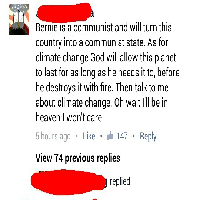

offensive 1.0
inflammatory 0.99
profanity 0.98
insult 0.96
toxic 0.8
obsence 0.72
severe toxic 0.7
racist 0.2
non-racist 0.01
slavery 0.0
pleasant in meaning 0.0
non offensive 0.0
This image contains offensive content :  0 |SOFTMAX|  0.8 |  0.2
This image shows black people as slaves :  0 |SOFTMAX|  1.0 |  0.0
This image is filled with text :  1 |SOFTMAX|  0.3 |  0.7
            **********************************  Hence, the  PREDICTION is =    [['Non-offensiv']]


In [385]:
#@title  Select a Random input to test. { run: "auto" }

Random_slider = 146 #@param {type:"slider", min:0, max:400, step:1}


dftemp = dfraw.copy(deep=True)
dftemp = dftemp[Random_slider:Random_slider+1]
x_inferTEMP = dftemp.copy(deep=True)
deletecolumsinDF(x_inferTEMP)
y_TEMP = x_inferTEMP.pop("label")
print('           ********************************************     GROUND TRUTH is  =    ' + str( y_TEMP)  )

predicted_y = clf.predict(x_inferTEMP)
print('            ********************************************   PREDICTION by AI is =    ' + str(predicted_y)   )
explainMe(dftemp, Random_slider)

print('            **********************************  Hence, the  PREDICTION is =    ' + str(predicted_y)   )

1/1 [==============================] - 0s 7ms/step


array([['Non-offensiv']], dtype='<U12')

In [ ]:
def explainMe(dftemp):


In [314]:
dftemp

,image_name,sentence,label,DATASET,CAT.isOffensiveText1,NUM.isOffensiveText1softm0,NUM.isOffensiveText1softm1,NUM.offensive,NUM.inflammatory,NUM.profanity,...,NUM.non offensive,CAT.NLVR.offensive,NUM.NLVR.offensive0,NUM.NLVR.offensive1,CAT.NLVR.black people as slaves,NUM.NLVR.black people as slaves0,NUM.NLVR.black people as slaves1,CAT.NLVR.is filled with text,NUM.NLVR.is filled with text0,NUM.NLVR.is filled with text1
246,W3jhTxL.png,REPUBLICAN FACEBOOK PAGE ASKED.IF JESUS HAD A ...,offensive,TRAIN,0.0,0.8,0.2,0.678,0.822,0.16,...,0.012,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [272]:
from PIL import Image


REPUBLICAN FACEBOOK PAGE ASKED.IF JESUS HAD A GUN WHAT KIND WOULD IT BE IPOSTED THIS AND THEY BANNED ME 


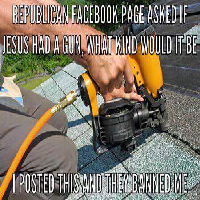

offensive 1.0
inflammatory 0.99
profanity 0.98
insult 0.96
toxic 0.8
obsence 0.72
severe toxic 0.7
racist 0.2
non-racist 0.01
slavery 0.0
pleasant in meaning 0.0
non offensive 0.0
This image contains offensive content :  1 |SOFTMAX|  0.0 |  1.0
This image shows black people as slaves :  0 |SOFTMAX|  1.0 |  0.0
This image is filled with text :  1 |SOFTMAX|  0.0 |  1.0


In [328]:
explainMe(dftemp, 246)

In [325]:
type(dftemp['sentence']  )



KeyError: ignored

In [358]:
def explainMe(dftemp, anumber):
  TEMPsequence_to_classify = dftemp['sentence'][anumber]
  print(TEMPsequence_to_classify)
  TEMPimage1 = Image.open(dftemp['image_name'][anumber])
  display(TEMPimage1.resize((200, 200), 0))
  TEMPimage1 = TEMPimage1.convert('RGB')


  TEMPpredictedclasses = ZSclassifier(TEMPsequence_to_classify, ZEROSHOTcandidate_labels, multi_label=True)
  for p in range(len(TEMPpredictedclasses['labels'])):
    print(  predictedclasses['labels'][p]  + " " +  str( round ( predictedclasses['scores'][p] , 2)))

  for p in range( len(VISUALREASONING_FactorsALL_ColomnName) ):
    isVisualAnsCAT, isVisualAns0NUM, isVisualAns1NUM  = understnadImage1(TEMPimage1, VISUALREASONING_FactorsALL_Reasoning[p])
    print( VISUALREASONING_FactorsALL_Reasoning[p] + " :  " + str( round( isVisualAnsCAT) )   + " |SOFTMAX|  " + str( round( isVisualAns0NUM, 4)  )  + " |  " + str( round( isVisualAns1NUM, 4)  ))


NameError: ignored

In [ ]:
y_trainTEMP

In [ ]:
predicted_y = clf.predict(x_trainTEMP)


In [ ]:
predicted_y

In [ ]:
# Evaluate the best model with testing data.
clf.evaluate(x_train, y_train)